# Two Sigma News - EDA

## Loading useful libraries and datasets

In [1]:
import pandas as pd
import numpy as np

In [2]:
market_train_df = pd.read_pickle("../shared/datasets/market_train_df.pkl")
news_train_df = pd.read_pickle("../shared/datasets/news_train_df.pkl")

## Dimensionality, feature names and feature types of data

In [4]:
print(market_train_df.shape, news_train_df.shape)

(4072956, 16) (9328750, 35)


In [5]:
print(market_train_df.columns)
print(news_train_df.columns)

Index(['time', 'assetCode', 'assetName', 'volume', 'close', 'open',
       'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10', 'universe'],
      dtype='object')
Index(['time', 'sourceTimestamp', 'firstCreated', 'sourceId', 'headline',
       'urgency', 'takeSequence', 'provider', 'subjects', 'audiences',
       'bodySize', 'companyCount', 'headlineTag', 'marketCommentary',
       'sentenceCount', 'wordCount', 'assetCodes', 'assetName',
       'firstMentionSentence', 'relevance', 'sentimentClass',
       'sentimentNegative', 'sentimentNeutral', 'sentimentPositive',
       'sentimentWordCount', 'noveltyCount12H', 'noveltyCount24H',
       'noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D', 'volumeCounts12H',
       'volumeCounts24H', 'volumeCounts3D', 'volumeCounts5D',
       'volu

In [6]:
print(market_train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072956 entries, 0 to 4072955
Data columns (total 16 columns):
time                        datetime64[ns, UTC]
assetCode                   object
assetName                   category
volume                      float64
close                       float64
open                        float64
returnsClosePrevRaw1        float64
returnsOpenPrevRaw1         float64
returnsClosePrevMktres1     float64
returnsOpenPrevMktres1      float64
returnsClosePrevRaw10       float64
returnsOpenPrevRaw10        float64
returnsClosePrevMktres10    float64
returnsOpenPrevMktres10     float64
returnsOpenNextMktres10     float64
universe                    float64
dtypes: category(1), datetime64[ns, UTC](1), float64(13), object(1)
memory usage: 473.9+ MB
None


In [7]:
print(news_train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9328750 entries, 0 to 9328749
Data columns (total 35 columns):
time                    datetime64[ns, UTC]
sourceTimestamp         datetime64[ns, UTC]
firstCreated            datetime64[ns, UTC]
sourceId                object
headline                object
urgency                 int8
takeSequence            int16
provider                category
subjects                category
audiences               category
bodySize                int32
companyCount            int8
headlineTag             object
marketCommentary        bool
sentenceCount           int16
wordCount               int32
assetCodes              category
assetName               category
firstMentionSentence    int16
relevance               float32
sentimentClass          int8
sentimentNegative       float32
sentimentNeutral        float32
sentimentPositive       float32
sentimentWordCount      int32
noveltyCount12H         int16
noveltyCount24H         int16
noveltyCount3

In [8]:
print('Summary of numerical features of market data')
market_train_df.describe()

Summary of numerical features of market data


,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
count,4.072956e+06,4.072956e+06,4.072956e+06,4.072956e+06,4.072956e+06,4.056976e+06,4.056968e+06,4.072956e+06,4.072956e+06,3.979946e+06,3.979902e+06,4.072956e+06,4.072956e+06
mean,2.665312e+06,3.971241e+01,3.971233e+01,5.473026e-04,9.569113e-03,1.738580e-04,9.309293e-03,5.232021e-03,1.423685e-02,1.638857e-03,1.481702e-02,1.405528e-02,5.949365e-01
std,7.687606e+06,4.228822e+01,4.261116e+01,3.697774e-02,7.084388e+00,3.270305e-02,6.968866e+00,8.872484e-02,7.123552e+00,7.517820e-02,7.285742e+00,7.242467e+00,4.909044e-01
min,0.000000e+00,7.000000e-02,1.000000e-02,-9.776464e-01,-9.998881e-01,-1.235622e+00,-6.158463e+02,-9.774034e-01,-9.998904e-01,-3.343277e+00,-1.375045e+03,-1.375045e+03,0.000000e+00
25%,4.657968e+05,1.725000e+01,1.725000e+01,-1.089241e-02,-1.108987e-02,-8.569246e-03,-1.002114e-02,-3.339148e-02,-3.337574e-02,-2.927584e-02,-2.962645e-02,-2.970509e-02,0.000000e+00
50%,9.821000e+05,3.030000e+01,3.029000e+01,3.373819e-04,3.824092e-04,-1.236127e-04,-3.356938e-06,5.160339e-03,5.165128e-03,8.329261e-04,1.126206e-03,1.044642e-03,1.000000e+00
75%,2.403165e+06,4.986000e+01,4.985000e+01,1.165695e-02,1.183612e-02,8.397528e-03,1.002712e-02,4.297606e-02,4.298507e-02,3.059022e-02,3.171535e-02,3.152750e-02,1.000000e+00
max,1.226791e+09,1.578130e+03,9.998990e+03,4.559245e+01,9.209000e+03,4.512244e+01,8.989207e+03,4.667181e+01,9.382000e+03,4.624971e+01,9.761338e+03,9.761338e+03,1.000000e+00


In [9]:
print('Summary of numerical features of news data')
news_train_df.describe()

Summary of numerical features of news data


,urgency,takeSequence,bodySize,companyCount,sentenceCount,wordCount,firstMentionSentence,relevance,sentimentClass,sentimentNegative,...,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
count,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,...,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06
mean,2.321202e+00,2.122825e+00,3.768918e+03,5.027720e+00,2.250942e+01,5.804340e+02,4.817400e+00,7.428699e-01,8.614659e-02,2.723192e-01,...,1.385130e+00,1.587036e+00,2.122713e+00,2.574199e+00,3.170360e+00,8.522672e+00,1.230676e+01,2.206458e+01,3.008566e+01,4.050544e+01
std,9.470095e-01,2.944505e+00,7.475653e+03,8.787980e+00,3.601975e+01,9.580591e+02,1.217714e+01,3.814900e-01,8.257177e-01,2.855101e-01,...,8.220864e+00,8.533866e+00,1.071454e+01,1.295648e+01,1.657174e+01,2.930322e+01,3.436895e+01,5.431875e+01,6.990158e+01,8.948574e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.258400e-03,-1.000000e+00,6.296000e-03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,1.000000e+00,3.535530e-01,-1.000000e+00,3.428290e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
50%,3.000000e+00,1.000000e+00,1.571000e+03,1.000000e+00,1.000000e+01,2.590000e+02,1.000000e+00,1.000000e+00,0.000000e+00,1.492690e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01,1.300000e+01
75%,3.000000e+00,2.000000e+00,4.504000e+03,5.000000e+00,3.000000e+01,7.650000e+02,2.000000e+00,1.000000e+00,1.000000e+00,5.328630e-01,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00,1.300000e+01,2.200000e+01,3.000000e+01,4.100000e+01
max,3.000000e+00,9.700000e+01,1.227700e+05,4.300000e+01,1.205000e+03,2.026300e+04,9.890000e+02,1.000000e+00,1.000000e+00,8.197120e-01,...,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,2.564000e+03,2.569000e+03,2.586000e+03,2.599000e+03,2.974000e+03


In [10]:
market_train_df.describe(include=['bool', 'category', 'object'])

,assetCode,assetName
count,4072956,4072956
unique,3780,3511
top,RF.N,Unknown
freq,2498,24279


In [11]:
news_train_df.describe(include=['bool', 'category', 'object'])

,sourceId,headline,provider,subjects,audiences,headlineTag,marketCommentary,assetCodes,assetName
count,9328750,9328750,9328750,9328750,9328750,9328750,9328750,9328750,9328750
unique,6340206,5532379,30,1733963,88488,163,2,10691,8902
top,d303d3669aa0de72,,RTRS,"{'US', 'LEN'}","{'E', 'U'}",,False,"{'AAPL.F', 'AAPL.OQ', 'AAPL.DE', 'AAPL.O'}",Barclays PLC
freq,43,73960,7287840,24775,2153642,6341993,8814072,62783,64350


In [12]:
news_train_df['provider'].value_counts()[:5]

RTRS    7287840
PRN      687327
BSW      659798
MKW      171630
GNW      156367
Name: provider, dtype: int64

In [13]:
news_train_df['headlineTag'].value_counts()[:5]

                         6341993
BRIEF                     527123
UPDATE 1                  354579
U.S. RESEARCH ROUNDUP     286698
UPDATE 2                  197690
Name: headlineTag, dtype: int64

In [14]:
news_train_df['marketCommentary'].value_counts()

False    8814072
True      514678
Name: marketCommentary, dtype: int64

In [15]:
news_train_df['assetName'].value_counts()[:5]

Barclays PLC            64350
Citigroup Inc           63689
Apple Inc               62783
JPMorgan Chase & Co     60635
Bank of America Corp    57560
Name: assetName, dtype: int64

## Load charting package and do some graphical exploration

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt 
# pip install seaborn 
import seaborn as sns

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


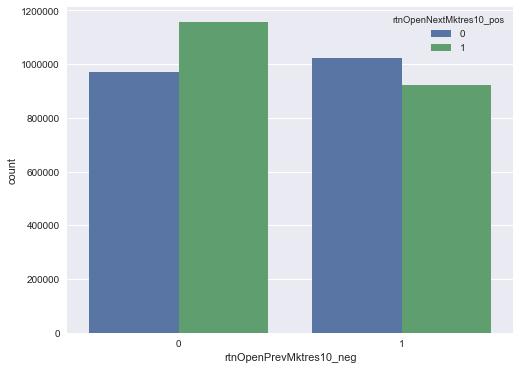

In [24]:
plt.rcParams['figure.figsize'] = (8, 6)

market_train_df['rtnOpenPrevMktres10_neg']=(market_train_df['returnsOpenPrevMktres10']<0).astype(int)

sns.countplot(x='rtnOpenPrevMktres10_neg', hue='rtnOpenNextMktres10_pos', data=market_train_df);